**Jonathan Wang**
**2/1/18**


**Analyzing PISA Test Scores**

The United States is one of the world's leading powerhouses in technology, media, and art, yet one aspect of the States sticks out like a sore thumb: its education system. The United States' test scores and general education system has consistenly ranked towards the middle-bottom half of the world, with the top being dominated by East Asian forces such as China and Singapore. 

Having the world's most prestigious universities should indicate strength in the American education system, but the results show otherwise. In this study, I analyze the past few years of PISA Test Scores to glean some information on this conundrum.

**Setup**

We begin by importing the Pandas and MatPlotLib modules for managing dataframes and plotting graphs respectively.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

path = "/Users/jonathanwang/Downloads/NYU/2017-2018 Junior Year/Data Bootcamp/Old Semester/All_Scores.XLS"

Next, we'll continue by looking at the international PISA Test scores from 2012. From the path, we'll read the Excel file and trim the data into a neat dataframe.

In [3]:
scores = pd.read_excel(path,
                   skiprows = 18,
                   skipfooter = 7,
                   usecols = [0, 1, 9, 13],
                   index_col = 0,
                   header = [0,1]
                   )

scores = scores.dropna()
scores.columns = ["Math", "Reading", "Science"]

**Graphing**

To begin plotting, we define function showSubjectPlot. Given a subject argument, the function shows all countries' scores.

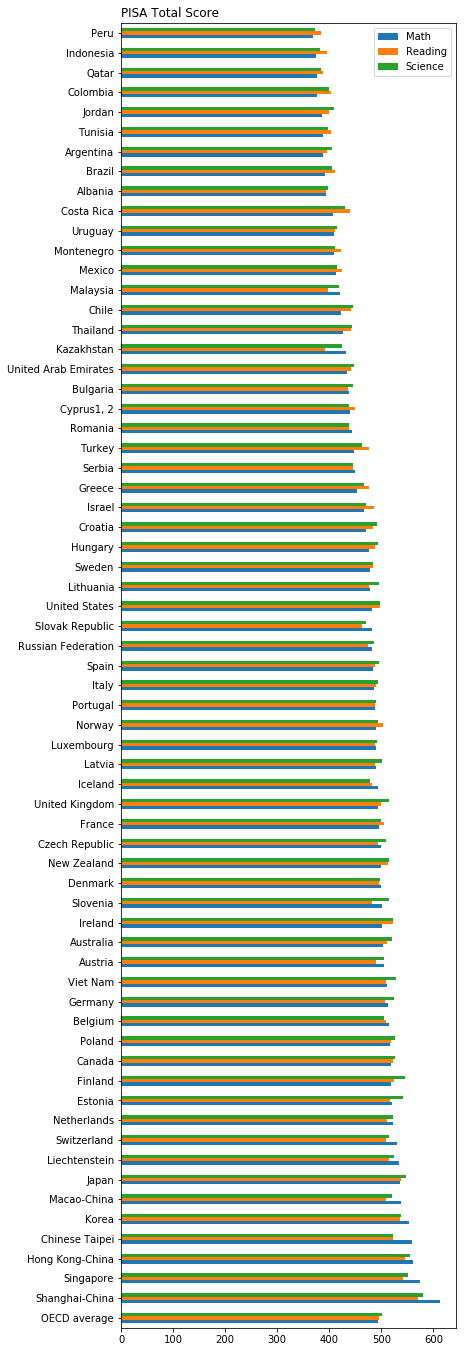

In [4]:
def showSubjectPlot(subject):
    fig, name = plt.subplots()
    scores[subject].plot(kind = 'barh',
                     ax = name,
                     figsize = (6, 18),
                     alpha = .65)
    name.set_title("PISA " + str(subject) + " Score", loc = 'left')
    name.get_children()[36].set_color('r')

# Now call the method on the subjects below

# Total Scores

fig, total = plt.subplots()
scores.plot(kind = 'barh',
        ax = total,
        figsize = (6,24),
        )

total.set_title("PISA Total Score", loc = 'left')

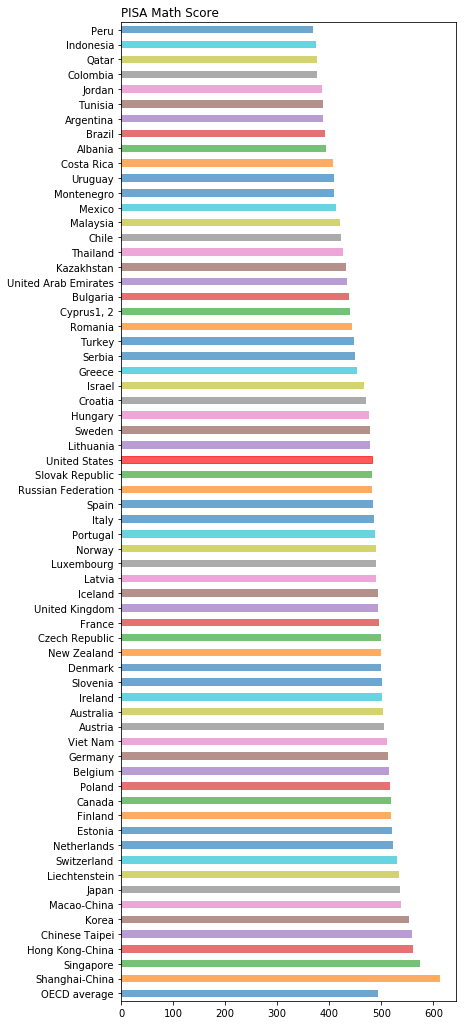

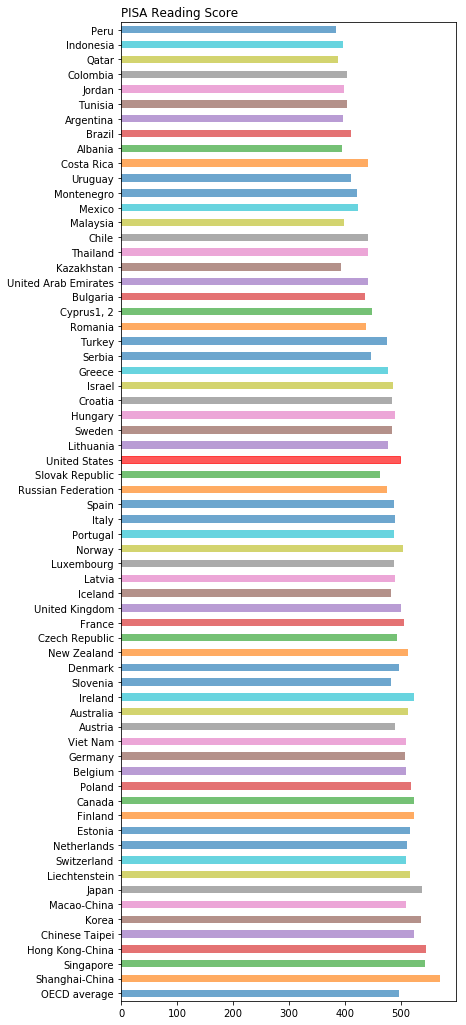

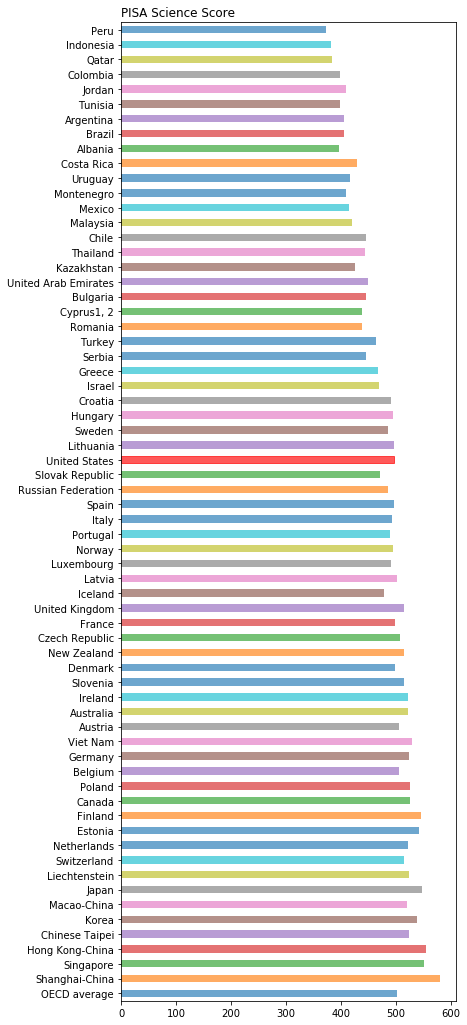

In [5]:
# Individual Subject Scores

showSubjectPlot("Math")
showSubjectPlot("Reading")
showSubjectPlot("Science")

Let's take a glance at the top and bottom performers in the world now.

In [6]:
# Top performing countries
print(scores.head())

# Bottom performing countries
print(scores.tail())

                       Math     Reading     Science
OECD average     494.046447  496.462864  501.159793
Shanghai-China   612.675536  569.588408  580.117831
Singapore        573.468314  542.215834  551.493157
Hong Kong-China  561.241096  544.600086  554.937434
Chinese Taipei   559.824796  523.118904  523.314904
                 Math     Reading     Science
Jordan     385.595556  399.034747  409.367215
Colombia   376.488601  403.402534  398.678632
Qatar      376.448399  387.504131  383.642553
Indonesia  375.114452  396.120095  381.911485
Peru       368.102547  384.151223  373.113448


In [7]:
def printCountryScore(country, dataframe):
    for subject in dataframe:
        print(country, subject + ": " + str(dataframe[subject][country]))
    print()

# Print all US Scores
printCountryScore("United States", scores)

printCountryScore("Shanghai-China", scores)

United States Math: 481.366786279
United States Reading: 497.581718117
United States Science: 497.409811483

Shanghai-China Math: 612.675536305
Shanghai-China Reading: 569.588407749
Shanghai-China Science: 580.117830848



The United States is below the world average in Math and Science, and is above the world average for Reading by about 1 point, coming in at 36th out of 65 countries.

The answer for this discrepancy may lie in the variance in test scores in the states in the US. For example, while California, New York, and Massachusetts are hubs of higher education, more obscure states may attract less bright students and subsequently yield lower standardized test scores. With this in mind, let's take a look at specific states in the US:

In [17]:
# Data was pulled from National Center for Education Statistics (NCES) official website: https://nces.ed.gov/surveys/pisa/pisa2015/pisa2015highlights_7_5.asp
# Massachusetts
mass_data = {'Science':529,
            'Reading':527,
            'Math':500}

mass_race = {'White':514,
             'Black':451,
             'Hispanic':450,
             'Asian':526,
             'Multiracial':490}

# Percentage of students in enrolled schools eligible for free lunch

mass_income = {'<10%': 581,
              '10 - 24.9%':553,
              '25 - 49.9%':521,
              '50 - 74.9%':505,
              '>75%':469}

# Puerto Rico
pr_data = {'Science':403,
          'Reading':410,
          'Math':378}

pr_income = {'<10%':'n/a',
          '10 - 24.9%':'n/a',
          '25 - 49.9%':391,
            '50 - 74.9%':363,
            '>75%':361}

print("Massachusetts Average:", mass_data)
print("Massachusetts percentage of students in schools eligible for free lunch:", mass_income)
print("Puerto Rico Average:", pr_data)
print("Puerto Rico percentage of students in schools eligible for free lunch:", pr_income)

Massachusetts Average: {'Science': 529, 'Reading': 527, 'Math': 500}
Massachusetts percentage of students in schools eligible for free lunch: {'<10%': 581, '10 - 24.9%': 553, '25 - 49.9%': 521, '50 - 74.9%': 505, '>75%': 469}
Puerto Rico Average: {'Science': 403, 'Reading': 410, 'Math': 378}
Puerto Rico percentage of students in schools eligible for free lunch: {'<10%': 'n/a', '10 - 24.9%': 'n/a', '25 - 49.9%': 391, '50 - 74.9%': 363, '75%': 361}


When looking at Massachusetts alone, we can see that the average across all three subjects is significantly higher than the country as a whole. On the other hand, Puerto Rico, a territory of the United States, has comparably lower statistics for three subjects. This can be attributed to Puerto Rico's general poverty, with an overwhelming 45% of the population living below the poverty line, compared to Massachusetts' 12%.

The poorest of Puerto Rican students in schools with over 75% of students eligible for free lunch scored below half the possible points on each section. Dennis Van Roekel, president of National Education Association, attributes the U.S.'s poor performance to students afflicted by poverty.